In [1]:
#Q1
import pandas as pd
from pandas import Series, DataFrame
%pylab inline

df = pd.read_csv('NYC_Restaurants.csv', dtype=unicode)

#Creates the new column 'RESTAURANT' and prints the first 10 values
df['RESTAURANT']=df['DBA']+' '+df['BUILDING']+' '+df['STREET']+' '+df['ZIPCODE']+' '+df['BORO']
print df['RESTAURANT'][:10]

Populating the interactive namespace from numpy and matplotlib
0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: RESTAURANT, dtype: object


In [2]:
#Q2: determines the number of unique restaurants and prints the value
unique_restaurants=len(df['RESTAURANT'].unique())
print unique_restaurants


10114


In [3]:
#Q3

#Drops duplicate addresses so we don't count repeating restaurant locations as chains
unique_restaurants_df=df.drop_duplicates(subset=['RESTAURANT'])

#Creates a boolean mask that tests if each restaurant occurs more than once and filters out
#single restaurants
mask=[index>1 for index in unique_restaurants_df['DBA'].value_counts()]

#Prints the total number of chains
chains=(unique_restaurants_df['DBA'].value_counts())[mask]
print len(chains)



368


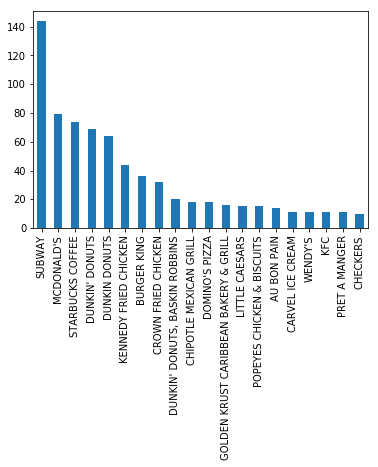

In [5]:
#Q4: Plots the top 20 most common chains
chains[:20].plot(kind='bar')

In [6]:
#Q5:Calculates and prints the fraction of the total number of chain locations divided by total 
#number of unique restaurant locations
print 1.0*sum(chains)/unique_restaurants


0.16472216729286138


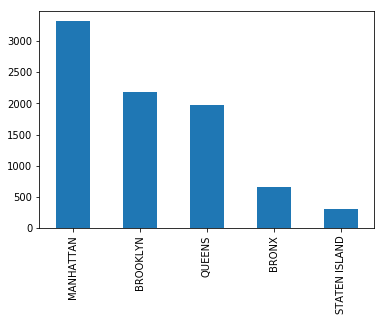

In [7]:
#Q6: 
#Creates non_chain_mask to filter out chain restaurants from chain_df2
non_chain_mask=[unique_restaurants_df['DBA'].value_counts()[restaurant]==1 for restaurant in\
                unique_restaurants_df['DBA']]

#Creates a borough mask to filter out the "missing" borough values
borough_mask= unique_restaurants_df['BORO'] != 'Missing'
non_chain_df2=unique_restaurants_df[['DBA','BORO']][non_chain_mask & borough_mask]
#Plots the non-chain restaurants in each borough
non_chain_df2['BORO'].value_counts().plot(kind='bar')

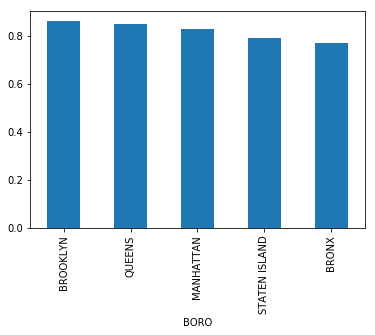

In [8]:
#Q7:

#Creates a new data frame from the original chain data frame, cutting out missing boroughs
total_df2=unique_restaurants_df[['DBA','BORO']][borough_mask]
fractions=[]

#Calculates the fraction for each borough and stores the borough and fraction in a tuple
for borough in non_chain_df2['BORO'].unique():
    non_chain_frac=1.0*non_chain_df2['BORO'].value_counts()[borough]/total_df2['BORO'].value_counts()[borough]
    fractions.append((borough,non_chain_frac))
    #print non_chain_frac
    
#Sorts the tuples by the fraction in descending order
fractions=sorted(fractions, key = lambda x: x[1],reverse=True)

#Creates a new dataframe with the boroughs and corresponding sorted fractions and plots them
non_chain_frac_df=pd.DataFrame({'BORO':[frac[0] for frac in fractions],'FRAC':[frac[1] for frac in fractions]})

non_chain_frac_df=non_chain_frac_df.set_index('BORO')

non_chain_frac_df['FRAC'].plot(kind='bar')
#To answer the final question:
#No! Brooklyn has the highest fraction of non-chains, while Manhattan had the most non-chains.

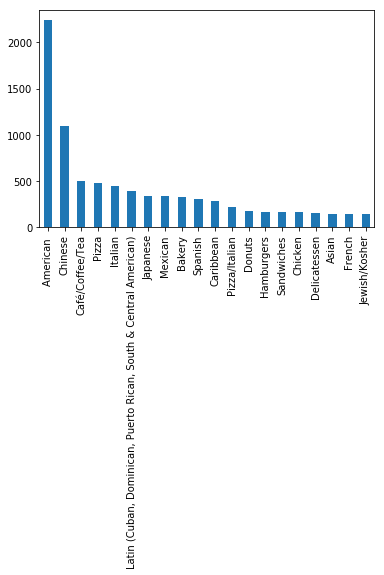

In [9]:
#Q8: Masks the original unique_restaurants data frame to contain only cuisines with 20 or more
#restaurants and plots the top 20

cuisine_mask=[index>=20 for index in unique_restaurants_df['CUISINE DESCRIPTION'].value_counts()]
unique_restaurants_df['CUISINE DESCRIPTION'].value_counts()[cuisine_mask][:20].plot(kind='bar')

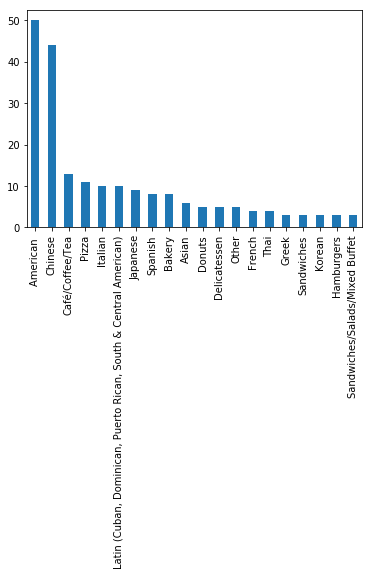

In [12]:
#Q9:
#need to check for every restaurant. if it NEVER had. so if it was clean 3 times and then the 4th was not clean, it is not clean.
df_clean = df[df['ACTION'] == 'No violations were recorded at the time of this inspection.']
df_dirty = df[df['ACTION'] != 'No violations were recorded at the time of this inspection.']
#use .isin to check if any restaurants with no violation had previous/eventual violation
mask = df_clean.RESTAURANT.isin(df_dirty.RESTAURANT).astype(bool)
#plot common restaurant cuisine types with no violation at all
df_clean[mask == False]['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind = 'bar')


In [15]:
#Q10:
#ADD COMMENTS HERE
cuisine = unique_restaurants_df['CUISINE DESCRIPTION'].value_counts()
cuisine20 = cuisine[cuisine.values > 20].keys() 
mask_8 = unique_restaurants_df['CUISINE DESCRIPTION'].value_counts()
mask_9 = df_clean[mask == False]['CUISINE DESCRIPTION'].value_counts()
mys = pd.Series()
for i in range(0,len(cuisine20)):
    mys = mys.append(pd.Series(mask_9[mask_9.keys() == cuisine20[i]]/mask_8[mask_8.keys() == cuisine20[i]]))
print mys.sort_values(ascending = False)[:10]

Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Greek                            0.054545
Other                            0.048544
Soups & Sandwiches               0.047619
Continental                      0.047619
Barbecue                         0.047619
Asian                            0.041096
Chinese                          0.040073
Peruvian                         0.035714
dtype: float64


In [64]:
#Q11: 

borough_mask=df['BORO']!='Missing'
crossTable=pd.crosstab(df['VIOLATION DESCRIPTION'],df['BORO'][borough_mask])
print crossTable.idxmax()

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object


In [67]:
#Q12:

violation_table=cross_table
#Calculates the frequency of each violation (sum of each column in the transpose)
violation_frequency=violation_table.T.sum()
#Normalization function:
def normalize(s):
    norm=s/violation_frequency
    return norm

#Normalizes each violation and prints the most common violation in each borough
norm_table=violation_table.apply(normalize)
print norm_table.idxmax()


BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object


In [39]:
#Q13:
import re
def get_area_code(string):
    area_code=string[:3]
    return area_code

#Adds the area code field to df
unique_restaurants_df['AREA CODE']=unique_restaurants_df['PHONE'].map(get_area_code)

#This mask gets rid of any area code that isn't three digits (or empty)
mask=[bool(re.match('\d\d\d',area_code)) for area_code in unique_restaurants_df['AREA CODE']]
unique_restaurants_df=unique_restaurants_df[mask]

area_codes_unique_zip=[]
#Creates a list of unique area codes
unique_ac=unique_restaurants_df['AREA CODE'].unique()

#Runs through each unique area code to test if it corresponds to a single zip code
for ac in unique_ac:
    zip_codes=[]
    #Gets every row with the same area code in df
    mask_area_code=[area_code==ac for area_code in unique_restaurants_df['AREA CODE']]
    df_temp=unique_restaurants_df[mask_area_code]  
    
    #Checks the length of ZIPCODE.value_counts.  If the length of that list is one, then there is only
    #one zip code for that area code, and we will add it to the requested list of area codes
    if len(df_temp['ZIPCODE'].value_counts())==1:
        area_codes_unique_zip.append(ac)
    
        
#Prints the result
print len(area_codes_unique_zip),'out of',len(unique_ac),'area codes correspond to a single zip code.'

C:\Users\Thomas\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


34 out of 55 area codes correspond to a single zip code.


In [11]:
#Q14

#Creates street type and street base columns and combines street base with zip code for a third column
df['STREET TYPE']=df['STREET'].str.rstrip().str.split(" ", expand=False).str[-1]
df['STREET BASE']=df['STREET'].str.lstrip().str.split(' ', expand=False).str[:-1].str.join(' ')
df['STREET BASE AND ZIP']=df['STREET BASE']+' '+df['ZIPCODE']


#Creates a new data frame out of those three columns
new_table=pd.DataFrame(columns=['STREET TYPE','STREET BASE','STREET BASE AND ZIP'])
new_table['STREET TYPE']=df['STREET TYPE']
new_table['STREET BASE']=df['STREET BASE']
new_table['STREET BASE AND ZIP']=df['STREET BASE AND ZIP']

#Merges the new data frame with itself
merged_table=new_table.merge(new_table,left_on='STREET BASE AND ZIP',right_on='STREET BASE AND ZIP',suffixes=['_1','_2'])

#Masks the new data frame to include only street types that are different from each other
merged_mask=merged_table['STREET TYPE_1']!=merged_table['STREET TYPE_2']
new_table_masked=merged_table[merged_mask]

#Creates a cross table out of the different street types and prints the most common
#street types for 'AVE', 'ST', etc.
cross_table=pd.crosstab(index=new_table_masked['STREET TYPE_1'],columns=new_table_masked['STREET TYPE_2'])

print 'AVE:\t\t',cross_table['AVE'].idxmax()
print 'ST:\t\t',cross_table['ST'].idxmax()
print 'RD:\t\t',cross_table['RD'].idxmax()
print 'PL:\t\t',cross_table['PL'].idxmax()
print 'BOULEARD:\t',cross_table['BOULEARD'].idxmax()
print 'BULEVARD:\t',cross_table['BULEVARD'].idxmax()

AVE:		AVENUE
ST:		STREET
RD:		ROAD
PL:		PLACE
BOULEARD:	BOULEVARD
BULEVARD:	BOULEVARD
